Compute unstructured hierarchical clustering...
Elapsed time: 0.06s
Number of points: 1500
Compute (Compatible) structured hierarchical clustering...
Elapsed time: 0.08s
Number of points: 1500
Compute (too big) structured hierarchical clustering...
Elapsed time: 1.58s
Number of points: 1500
Compute (too small) structured hierarchical clustering...


D:\CodeProgram\anconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:245: UserWarning: the number of connected components of the connectivity matrix is 475 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Elapsed time: 19.54s
Number of points: 1500


Text(0.5, 0, 'Z')

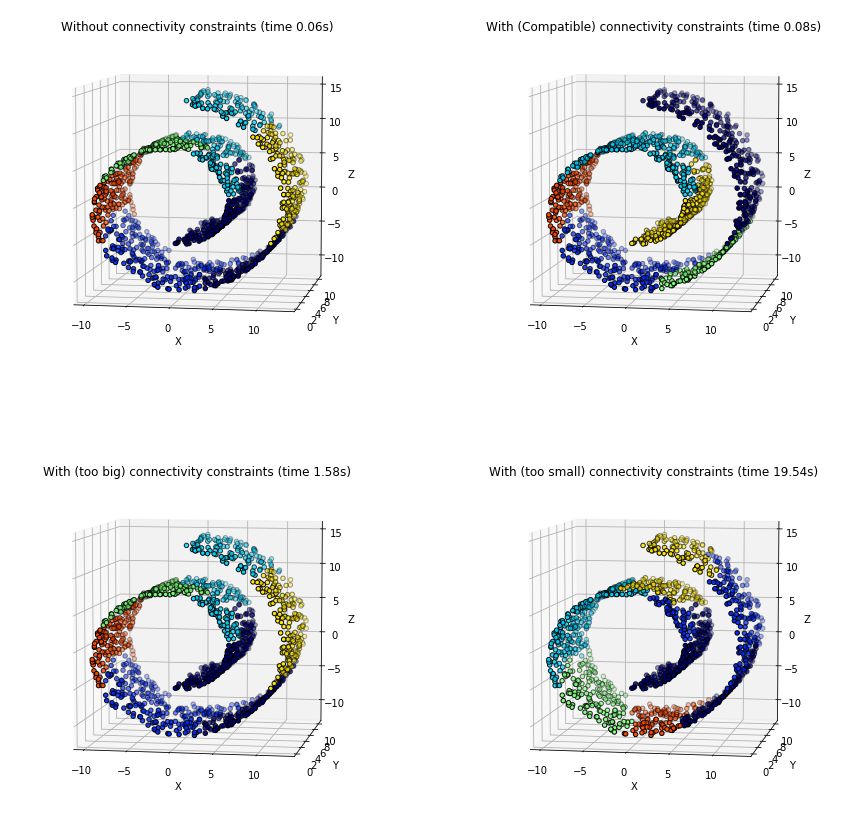

In [86]:
%matplotlib inline
import time as time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll
from sklearn.neighbors import kneighbors_graph

# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise)
# Make it thinner
X[:, 1] *= .5

# Compute clustering
print("Compute unstructured hierarchical clustering...")
st0 = time.time()
ward0 = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(X)
elapsed_time0 = time.time() - st0
label0 = ward0.labels_
print("Elapsed time: %.2fs" % elapsed_time0)
print("Number of points: %i" % label0.size)

# Plot result
fig = plt.figure(figsize=(15, 15))
ax0 = fig.add_subplot(221, projection='3d')
ax0.view_init(elev=7 # 将图形从下往上旋转7度
             ,azim=-80) # 将图形从左往右旋转-80度
for l in np.unique(label0):
    ax0.scatter(X[label0 == l, 0], X[label0 == l, 1], X[label0 == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(label0 + 1)),
               s=20, edgecolor='k')
plt.title('Without connectivity constraints (time %.2fs)' % elapsed_time0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')


# 选择合适的最近邻数,使得瑞士卷数据得到很好的分割
connectivity_compatible = kneighbors_graph(X, 
                                n_neighbors=10, # Number of neighbors for each sample(超参数)
                                include_self=False) # 计算X各行向量的最邻近距离
# Compute clustering
print("Compute (Compatible) structured hierarchical clustering...")
st1 = time.time()
ward1 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", 
                               connectivity=connectivity_compatible, # Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data
                               linkage='ward').fit(X)
elapsed_time1 = time.time() - st1
label1 = ward1.labels_
print("Elapsed time: %.2fs" % elapsed_time1)
print("Number of points: %i" % label1.size)

# Plot result
ax1 = fig.add_subplot(222, projection='3d')
ax1.view_init(7, -80)
for l in np.unique(label1):
    ax1.scatter(X[label1 == l, 0], X[label1 == l, 1], X[label1 == l, 2],
               color=plt.cm.jet(float(l) / np.max(label1 + 1)),
               s=20, edgecolor='k')
plt.title('With (Compatible) connectivity constraints (time %.2fs)' % elapsed_time1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')


# 最近邻数量过大,瑞士卷数据集没有得到较好的分割(相当于没有设置connectivity参数,还增加了计算负担)
connectivity_too_big = kneighbors_graph(X, 
                                n_neighbors=200,
                                include_self=False) # 计算X各行向量的最邻近距离
# Compute clustering
print("Compute (too big) structured hierarchical clustering...")
st2 = time.time()
ward2 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", 
                               connectivity=connectivity_too_big, # Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data
                               linkage='ward').fit(X)
elapsed_time2 = time.time() - st2
label2 = ward2.labels_
print("Elapsed time: %.2fs" % elapsed_time2)
print("Number of points: %i" % label2.size)

# Plot result
ax2 = fig.add_subplot(223, projection='3d')
ax2.view_init(7, -80)
for l in np.unique(label2):
    ax2.scatter(X[label2 == l, 0], X[label2 == l, 1], X[label2 == l, 2],
               color=plt.cm.jet(float(l) / np.max(label2 + 1)),
               s=20, edgecolor='k')
plt.title('With (too big) connectivity constraints (time %.2fs)' % elapsed_time2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')


# 最近邻数量太少,某些簇无法进行合并(簇之间不相交).故产生警告
connectivity_too_small = kneighbors_graph(X, 
                                n_neighbors=1, 
                                include_self=False) # 计算X各行向量的最邻近距离
# Compute clustering
print("Compute (too small) structured hierarchical clustering...")
st3 = time.time()
ward3 = AgglomerativeClustering(n_clusters=6, affinity="euclidean", 
                               connectivity=connectivity_too_small, # Connectivity matrix. Defines for each sample the neighboring samples following a given structure of the data
                               linkage='ward').fit(X)
elapsed_time3 = time.time() - st3
label3 = ward3.labels_
print("Elapsed time: %.2fs" % elapsed_time3)
print("Number of points: %i" % label3.size)

# Plot result
ax3 = fig.add_subplot(224, projection='3d')
ax3.view_init(7, -80)
for l in np.unique(label3):
    ax3.scatter(X[label3 == l, 0], X[label3 == l, 1], X[label3 == l, 2],
               color=plt.cm.jet(float(l) / np.max(label3 + 1)),
               s=20, edgecolor='k')
ax3.set_title('With (too small) connectivity constraints (time %.2fs)' % elapsed_time3)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')